In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar Datos

Leer el archivo CSV y cargarlo en un DataFrame de pandas.


In [33]:
em=pd.read_csv('data/Employee_Salaries.csv')

# 2.Exploracion Inicial.

Verificar la cantidad de registros y columnas en el DataFrame.

In [34]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


Mostrar las primeras filas del DataFrame para entender la estructura de los datos.

In [35]:
print(f'El dataframe tiene {len(em)} registros y tiene las siguientes columnas {em.columns}')

El dataframe tiene 10291 registros y tiene las siguientes columnas Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')


Mostrar los primeros registros.

In [36]:
em.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [37]:
em.sample(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
1120,COR,Correction and Rehabilitation,COR 42 DS MCCF Unit 2 Security,M,55759.000,120.68,0.00,C5
222,ABS,Alcohol Beverage Services,ABS 85 Goshen Crossing,F,60908.636,5422.71,0.00,14
873,COR,Correction and Rehabilitation,COR 42 DS MCCF Unit 1 Security,M,84976.000,17901.72,0.00,C4
4790,FRS,Fire and Rescue Services,FRS 45 Station 30,M,106504.000,6524.89,10939.30,F4
5013,FRS,Fire and Rescue Services,FRS 45 Station 7,F,96826.000,48834.77,6845.63,F3


Comprobar si hay valores nulos o faltantes en alguna columna.

In [38]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [39]:
em.isnull().sum() #muestra los nulos.

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

# 3.Transformación de datos.

Crear una nueva columna llamada "Salario_Mensual" que contenga el salario mensual de cada empleado (dividiendo el salario anual entre 12).

In [40]:
em['salario_mensual']= em['Base_Salary'] / 12 #salario mensual

Calcular el promedio de salario por departamento.

In [41]:
# Calcular el promedio de salario por departamento.
em.groupby('Department_Name')['salario_mensual'].mean()

Department_Name
Alcohol Beverage Services                                      5404.434987
Board of Appeals Department                                    8706.877244
Board of Elections                                             7126.428071
Community Engagement Cluster                                   6480.344856
Community Use of Public Facilities                             7625.927152
Correction and Rehabilitation                                  7080.015017
County Attorney's Office                                      10806.739197
County Council                                                 8812.880424
Department of Environmental Protection                         8720.372235
Department of Finance                                          9594.153443
Department of General Services                                 7668.492105
Department of Health and Human Services                        7422.027654
Department of Housing and Community Affairs                    8708.815398
Departmen

Filtrar los empleados que ganan más de $10 000 mensual.

In [42]:
#df[df["Horas_Trabajadas"] > 160]
em[em['salario_mensual']>10000]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,salario_mensual
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.00,0.0,0.00,M2,14656.083333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.36,0.0,0.00,M3,12134.446667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.00,0.0,0.00,M3,11414.166667
8,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,149464.15,0.0,9021.82,18,12455.345833
13,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,M,139407.15,0.0,0.00,M3,11617.262500
...,...,...,...,...,...,...,...,...,...
10284,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.00,0.0,0.00,N32,13233.500000
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.00,0.0,0.00,N28,11208.333333
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.10,0.0,0.00,NaN,17919.341667


# 4.Agregación de datos.

Calcular el salario total pagado por la empresa en el último mes.

In [43]:
em['salario_bruto'] = em['salario_mensual'] + (em['Overtime_Pay'] / 12) + (em['Longevity_Pay'] / 12)

In [44]:
em

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,salario_mensual,salario_bruto
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2,14656.083333,14656.083333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3,12134.446667,12134.446667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3,11414.166667,11414.166667
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21,7452.724500,7660.224500
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16,6578.916667,7138.448333
...,...,...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28,11208.333333,11208.333333
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN,17919.341667,17919.341667
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18,7030.462742,7030.462742
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21,8185.666667,8318.689167


In [45]:
nomina=em["salario_bruto"].sum()
print(f'La nomina mensual es de {nomina}')

La nomina mensual es de 85696019.19696666


Encontrar el o los empleado(s) con el salario más alto.

In [46]:
#df.loc[df["Salario"].idxmax()]
em[em['salario_bruto'] == em['salario_bruto'].max()]

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,salario_mensual,salario_bruto
4574,FRS,Fire and Rescue Services,FRS 45 Station 25,M,132119.0,223998.01,14123.92,B2,11009.916667,30853.410833


Calcular el total de empleados en cada departamento.

In [47]:
em.groupby('Department_Name')['Department'].count()

Department_Name
Alcohol Beverage Services                                      462
Board of Appeals Department                                      3
Board of Elections                                              34
Community Engagement Cluster                                   105
Community Use of Public Facilities                              30
Correction and Rehabilitation                                  513
County Attorney's Office                                        78
County Council                                                 131
Department of Environmental Protection                         185
Department of Finance                                          121
Department of General Services                                 424
Department of Health and Human Services                       1877
Department of Housing and Community Affairs                    101
Department of Permitting Services                              243
Department of Police                          

In [48]:
#df["Departamento"].value_counts()
em["Department_Name"].value_counts()

Department_Name
Department of Health and Human Services                       1877
Department of Police                                          1794
Fire and Rescue Services                                      1440
Department of Transportation                                  1289
Correction and Rehabilitation                                  513
Alcohol Beverage Services                                      462
Department of Public Libraries                                 427
Department of General Services                                 424
Department of Permitting Services                              243
Department of Recreation                                       193
Sheriff's Office                                               188
Department of Environmental Protection                         185
Department of Technology and Enterprise Business Solutions     159
County Council                                                 131
Department of Finance                         

# 5.Visualización de resultados.

Crear un gráfico de barras que muestre el número de empleados en cada departamento.

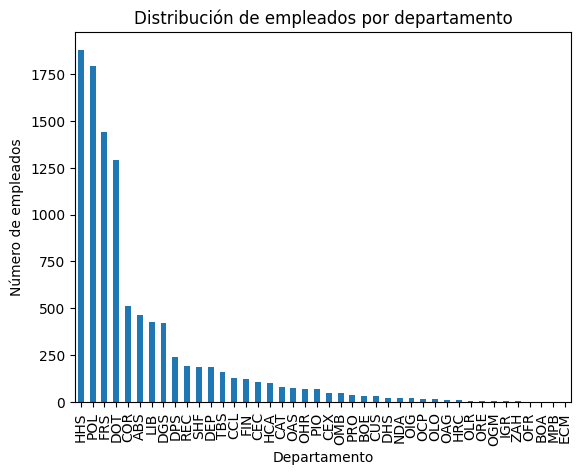

In [49]:
em["Department"].value_counts().plot(kind="bar")
plt.xlabel("Departamento")
plt.ylabel("Número de empleados")
plt.title("Distribución de empleados por departamento")
plt.show()